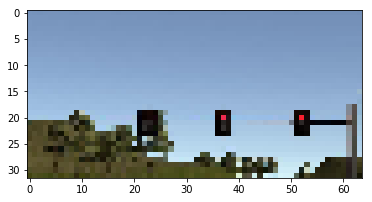

In [5]:
import glob
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

%matplotlib inline

light_regex = 'sim_(?P<color>[a-z]+)_[0-9]+.jpg'
X_train = []
y_train = []
for light in glob.glob('train/*.jpg'):
    im = cv2.imread(light)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (64,32))
    match = re.search(light_regex, light)
    
    X_train.append(im)
    if match.group('color') == 'green':
        y_train.append(0)
    elif match.group('color') == 'yellow':
        y_train.append(1)
    elif match.group('color') == 'red':
        y_train.append(2)
    
y_train = to_categorical(y_train)

X_train = np.array(X_train)
plt.imshow(X_train[0])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras import losses, optimizers, regularizers
import h5py

# Set up model architecture
num_classes = 3
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 64, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)),
    Dense(num_classes, activation='softmax')
])

loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [8]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=25, verbose=True, validation_split=0.1, shuffle=True)
score = model.evaluate(X_train, y_train, verbose=0)
print(score)

Train on 315 samples, validate on 36 samples
Epoch 1/25
315/315 [==============================] - 1s 4ms/step - loss: 5.6718 - acc: 0.6667 - val_loss: 4.6699 - val_acc: 0.7222
Epoch 2/25
315/315 [==============================] - 0s 1ms/step - loss: 5.5103 - acc: 0.6667 - val_loss: 4.5482 - val_acc: 0.7222
Epoch 3/25
315/315 [==============================] - 0s 1ms/step - loss: 5.4206 - acc: 0.6667 - val_loss: 4.5008 - val_acc: 0.7222
Epoch 4/25
315/315 [==============================] - 0s 1ms/step - loss: 5.3901 - acc: 0.6667 - val_loss: 4.4891 - val_acc: 0.7222
Epoch 5/25
315/315 [==============================] - 0s 1ms/step - loss: 3.0001 - acc: 0.5714 - val_loss: 1.1083 - val_acc: 0.7222
Epoch 6/25
315/315 [==============================] - 0s 1ms/step - loss: 3.3667 - acc: 0.5175 - val_loss: 1.1206 - val_acc: 0.7222
Epoch 7/25
315/315 [==============================] - 0s 991us/step - loss: 1.1282 - acc: 0.5810 - val_loss: 1.1294 - val_acc: 0.7222
Epoch 8/25
315/315 [=========

In [9]:
model.save('tl_simple.h5')